# **Workshop 3: Introduction to SQL and duckDB - Basic querying commands and joins**

In [ ]:
import duckdb

# Working with an available dataset (Covid19-patients 100k synthetic dataset)
## Dataset Link [Link](https://mitre.box.com/shared/static/wk3560f962ozlg7sd2oj1zxk73ayqvm0.zip)

## Let's download the database file

In [ ]:
!wget --content-disposition https://arizona.box.com/shared/static/uozg0z86rtdjupwpc7i971xwzuzhp42o.duckdb

--2024-02-11 09:58:57--  https://arizona.box.com/shared/static/uozg0z86rtdjupwpc7i971xwzuzhp42o.duckdb
Resolving arizona.box.com (arizona.box.com)... 74.112.186.144
Connecting to arizona.box.com (arizona.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/uozg0z86rtdjupwpc7i971xwzuzhp42o.duckdb [following]
--2024-02-11 09:58:57--  https://arizona.box.com/public/static/uozg0z86rtdjupwpc7i971xwzuzhp42o.duckdb
Reusing existing connection to arizona.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://arizona.app.box.com/public/static/uozg0z86rtdjupwpc7i971xwzuzhp42o.duckdb [following]
--2024-02-11 09:58:57--  https://arizona.app.box.com/public/static/uozg0z86rtdjupwpc7i971xwzuzhp42o.duckdb
Resolving arizona.app.box.com (arizona.app.box.com)... 74.112.186.144
Connecting to arizona.app.box.com (arizona.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaitin

In [ ]:
conn = duckdb.connect(database='/content/my_database.duckdb', read_only=True)

## Viewing what tables are available inside the database

In [ ]:
conn.sql("SHOW TABLES;")

┌───────────────────┐
│       name        │
│      varchar      │
├───────────────────┤
│ allergies         │
│ careplans         │
│ conditions        │
│ devices           │
│ encounters        │
│ imaging_studies   │
│ immunizations     │
│ medications       │
│ observations      │
│ organizations     │
│ patients          │
│ payer_transitions │
│ payers            │
│ procedures        │
│ providers         │
│ supplies          │
├───────────────────┤
│      16 rows      │
└───────────────────┘

## Before running any query we need to know the column names of particular tables

In [ ]:
conn.sql("DESCRIBE patients;")

┌─────────────────────┬─────────────┬─────────┬─────────┬─────────┬───────┐
│     column_name     │ column_type │  null   │   key   │ default │ extra │
│       varchar       │   varchar   │ varchar │ varchar │ varchar │ int32 │
├─────────────────────┼─────────────┼─────────┼─────────┼─────────┼───────┤
│ Id                  │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ BIRTHDATE           │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ DEATHDATE           │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ SSN                 │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ DRIVERS             │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ PASSPORT            │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ PREFIX              │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ FIRST               │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ LAST                │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ SUFFIX    

In [ ]:
conn.sql("DESCRIBE medications;")

┌───────────────────┬─────────────┬─────────┬─────────┬─────────┬───────┐
│    column_name    │ column_type │  null   │   key   │ default │ extra │
│      varchar      │   varchar   │ varchar │ varchar │ varchar │ int32 │
├───────────────────┼─────────────┼─────────┼─────────┼─────────┼───────┤
│ START             │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ STOP              │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ PATIENT           │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ PAYER             │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ ENCOUNTER         │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ CODE              │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ DESCRIPTION       │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ BASE_COST         │ DOUBLE      │ YES     │ NULL    │ NULL    │  NULL │
│ PAYER_COVERAGE    │ DOUBLE      │ YES     │ NULL    │ NULL    │  NULL │
│ DISPENSES         │ BIGINT      │ YE

## Querying Data
## **SELECT**
The SELECT statement is used to select data from a database.

### E.g.: Query the patients table and display patient first name, last name, gender, and the city they live in.

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY FROM patients;")

┌─────────────────┬────────────────┬─────────┬─────────────┐
│      FIRST      │      LAST      │ GENDER  │    CITY     │
│     varchar     │    varchar     │ varchar │   varchar   │
├─────────────────┼────────────────┼─────────┼─────────────┤
│ Jacinto644      │ Kris249        │ M       │ Springfield │
│ Alva958         │ Krajcik437     │ F       │ Walpole     │
│ Jimmie93        │ Harris789      │ F       │ Pembroke    │
│ Gregorio366     │ Auer97         │ M       │ Boston      │
│ Karyn217        │ Mueller846     │ F       │ Colrain     │
│ Jayson808       │ Fadel536       │ M       │ Chicopee    │
│ José Eduardo181 │ Gómez206       │ M       │ Chicopee    │
│ Milo271         │ Feil794        │ M       │ Somerville  │
│ Karyn217        │ Metz686        │ F       │ Medfield    │
│ Jeffrey461      │ Greenfelder433 │ M       │ Springfield │
│     ·           │     ·          │ ·       │    ·        │
│     ·           │     ·          │ ·       │    ·        │
│     ·           │     

## Count the number of rows in patients table
### This query will count the total number of rows in the patients table, effectively giving you the total number of patients.

In [ ]:
conn.sql("SELECT COUNT(*) FROM patients;")

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│       124150 │
└──────────────┘

## **COUNT** and **DISTINCT**
### If you want to count distinct values of a specific column, for example, distinct cities, you can modify the query as follows:

In [ ]:
conn.sql("SELECT COUNT(DISTINCT CITY) FROM patients;")

┌──────────────────────┐
│ count(DISTINCT CITY) │
│        int64         │
├──────────────────────┤
│                  351 │
└──────────────────────┘

### The following query returns unique combinations of cities and genders from the patients table. If there are male and female patients from the same city, each city-gender pair will appear only once.

In [ ]:
conn.sql("SELECT DISTINCT CITY, GENDER FROM patients;")

┌──────────────────┬─────────┐
│       CITY       │ GENDER  │
│     varchar      │ varchar │
├──────────────────┼─────────┤
│ Freetown         │ M       │
│ Rochester        │ F       │
│ Warwick          │ M       │
│ Westport         │ M       │
│ Needham          │ M       │
│ Leicester        │ F       │
│ Ipswich          │ F       │
│ Concord          │ M       │
│ Danvers          │ F       │
│ Winthrop         │ M       │
│    ·             │ ·       │
│    ·             │ ·       │
│    ·             │ ·       │
│ Wendell          │ F       │
│ Becket           │ M       │
│ Blandford        │ M       │
│ Hawley           │ F       │
│ West Stockbridge │ M       │
│ Rowe             │ F       │
│ Westhampton      │ M       │
│ Gosnold          │ F       │
│ Monroe           │ M       │
│ Tolland          │ F       │
├──────────────────┴─────────┤
│    700 rows (20 shown)     │
└────────────────────────────┘

### Filtering data based on a condition
## The **WHERE** clause filters records that fulfill a specified condition.

### e.g: Patients in City = 'Springfield';

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY, PASSPORT FROM patients WHERE city = 'Springfield';")

┌──────────────┬────────────────┬─────────┬─────────────┬────────────┐
│    FIRST     │      LAST      │ GENDER  │    CITY     │  PASSPORT  │
│   varchar    │    varchar     │ varchar │   varchar   │  varchar   │
├──────────────┼────────────────┼─────────┼─────────────┼────────────┤
│ Jacinto644   │ Kris249        │ M       │ Springfield │ NULL       │
│ Jeffrey461   │ Greenfelder433 │ M       │ Springfield │ NULL       │
│ Sabina296    │ Flatley871     │ F       │ Springfield │ X85058581X │
│ Theodora872  │ Johnson679     │ F       │ Springfield │ X21164602X │
│ Lavera253    │ Anderson154    │ F       │ Springfield │ X83686992X │
│ Golden321    │ Pollich983     │ F       │ Springfield │ NULL       │
│ Georgiann138 │ Greenfelder433 │ F       │ Springfield │ X58134116X │
│ Fausto876    │ Bechtelar572   │ M       │ Springfield │ NULL       │
│ Talisha682   │ Brakus656      │ F       │ Springfield │ X53645004X │
│ Golden321    │ Durgan499      │ F       │ Springfield │ X49016634X │
│    ·

## Multiple conditions in Selection
### e.g 1: Female Patients in City = 'Springfield';

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY FROM patients WHERE city = 'Springfield' AND gender = 'F';")

┌──────────────┬────────────────┬─────────┬─────────────┐
│    FIRST     │      LAST      │ GENDER  │    CITY     │
│   varchar    │    varchar     │ varchar │   varchar   │
├──────────────┼────────────────┼─────────┼─────────────┤
│ Sabina296    │ Flatley871     │ F       │ Springfield │
│ Theodora872  │ Johnson679     │ F       │ Springfield │
│ Lavera253    │ Anderson154    │ F       │ Springfield │
│ Golden321    │ Pollich983     │ F       │ Springfield │
│ Georgiann138 │ Greenfelder433 │ F       │ Springfield │
│ Talisha682   │ Brakus656      │ F       │ Springfield │
│ Golden321    │ Durgan499      │ F       │ Springfield │
│ Jerrie417    │ Gislason620    │ F       │ Springfield │
│ Venus149     │ Hodkiewicz467  │ F       │ Springfield │
│ Refugia211   │ Wintheiser220  │ F       │ Springfield │
│    ·         │     ·          │ ·       │      ·      │
│    ·         │     ·          │ ·       │      ·      │
│    ·         │     ·          │ ·       │      ·      │
│ Tisha655    

### e.g. Nested selection; Female patients from City Springfield or Boston

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY FROM patients WHERE gender = 'F' AND (city = 'Springfield' OR city = 'Boston');")

┌──────────────┬────────────────┬─────────┬─────────────┐
│    FIRST     │      LAST      │ GENDER  │    CITY     │
│   varchar    │    varchar     │ varchar │   varchar   │
├──────────────┼────────────────┼─────────┼─────────────┤
│ Sabina296    │ Flatley871     │ F       │ Springfield │
│ Theodora872  │ Johnson679     │ F       │ Springfield │
│ Lavera253    │ Anderson154    │ F       │ Springfield │
│ Golden321    │ Pollich983     │ F       │ Springfield │
│ Georgiann138 │ Greenfelder433 │ F       │ Springfield │
│ Talisha682   │ Brakus656      │ F       │ Springfield │
│ Golden321    │ Durgan499      │ F       │ Springfield │
│ Jerrie417    │ Gislason620    │ F       │ Springfield │
│ Venus149     │ Hodkiewicz467  │ F       │ Springfield │
│ Refugia211   │ Wintheiser220  │ F       │ Springfield │
│     ·        │    ·           │ ·       │   ·         │
│     ·        │    ·           │ ·       │   ·         │
│     ·        │    ·           │ ·       │   ·         │
│ Freida957   

### another way

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY FROM patients WHERE gender = 'F' AND (city IN ('Springfield','Boston'));")

┌──────────────┬────────────────┬─────────┬─────────────┐
│    FIRST     │      LAST      │ GENDER  │    CITY     │
│   varchar    │    varchar     │ varchar │   varchar   │
├──────────────┼────────────────┼─────────┼─────────────┤
│ Sabina296    │ Flatley871     │ F       │ Springfield │
│ Theodora872  │ Johnson679     │ F       │ Springfield │
│ Lavera253    │ Anderson154    │ F       │ Springfield │
│ Golden321    │ Pollich983     │ F       │ Springfield │
│ Georgiann138 │ Greenfelder433 │ F       │ Springfield │
│ Talisha682   │ Brakus656      │ F       │ Springfield │
│ Golden321    │ Durgan499      │ F       │ Springfield │
│ Jerrie417    │ Gislason620    │ F       │ Springfield │
│ Venus149     │ Hodkiewicz467  │ F       │ Springfield │
│ Refugia211   │ Wintheiser220  │ F       │ Springfield │
│     ·        │    ·           │ ·       │   ·         │
│     ·        │    ·           │ ·       │   ·         │
│     ·        │    ·           │ ·       │   ·         │
│ Freida957   

## Filter on missing data
### Filtering on missing data is crucial for maintaining data integrity and ensuring accurate analysis by identifying and handling incomplete records effectively.

### Retrieve the first name, last name, gender, and city for all patients who are from Springfield and have a passport number recorded (i.e., the passport field is not empty).

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY, PASSPORT FROM patients WHERE city = 'Springfield' AND PASSPORT IS NOT NULL;")

┌──────────────┬────────────────┬─────────┬─────────────┬────────────┐
│    FIRST     │      LAST      │ GENDER  │    CITY     │  PASSPORT  │
│   varchar    │    varchar     │ varchar │   varchar   │  varchar   │
├──────────────┼────────────────┼─────────┼─────────────┼────────────┤
│ Sabina296    │ Flatley871     │ F       │ Springfield │ X85058581X │
│ Theodora872  │ Johnson679     │ F       │ Springfield │ X21164602X │
│ Lavera253    │ Anderson154    │ F       │ Springfield │ X83686992X │
│ Georgiann138 │ Greenfelder433 │ F       │ Springfield │ X58134116X │
│ Talisha682   │ Brakus656      │ F       │ Springfield │ X53645004X │
│ Golden321    │ Durgan499      │ F       │ Springfield │ X49016634X │
│ Ty725        │ Schmeler639    │ M       │ Springfield │ X22960735X │
│ Pilar644     │ Pouros728      │ F       │ Springfield │ X21434326X │
│ Georgette866 │ Stark857       │ F       │ Springfield │ X84034866X │
│ Annika454    │ Gutmann970     │ F       │ Springfield │ X3275916X  │
│     

## Retrieve the first name, last name, gender, and city for all patients who are from Springfield and have a passport number NOT recorded (i.e., the passport field is empty).

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY,PASSPORT FROM patients WHERE city = 'Springfield' AND PASSPORT IS NULL;;")

┌───────────────┬────────────────┬─────────┬─────────────┬──────────┐
│     FIRST     │      LAST      │ GENDER  │    CITY     │ PASSPORT │
│    varchar    │    varchar     │ varchar │   varchar   │ varchar  │
├───────────────┼────────────────┼─────────┼─────────────┼──────────┤
│ Jacinto644    │ Kris249        │ M       │ Springfield │ NULL     │
│ Jeffrey461    │ Greenfelder433 │ M       │ Springfield │ NULL     │
│ Golden321     │ Pollich983     │ F       │ Springfield │ NULL     │
│ Fausto876     │ Bechtelar572   │ M       │ Springfield │ NULL     │
│ Jerrie417     │ Gislason620    │ F       │ Springfield │ NULL     │
│ Venus149      │ Hodkiewicz467  │ F       │ Springfield │ NULL     │
│ Tyler508      │ Hammes673      │ M       │ Springfield │ NULL     │
│ Refugia211    │ Wintheiser220  │ F       │ Springfield │ NULL     │
│ Julissa825    │ MacGyver246    │ F       │ Springfield │ NULL     │
│ Hans694       │ Sporer811      │ M       │ Springfield │ NULL     │
│   ·           │   

In [ ]:
2221+593

2814

## Filter and select in numeric range

### Patients in City = 'Springfield' where the HEALTHCARE_EXPENSES between 1.5M and 2M

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY FROM patients WHERE city = 'Springfield' AND HEALTHCARE_EXPENSES BETWEEN 1500000 AND 2000000;")

┌──────────────┬────────────────┬─────────┬─────────────┐
│    FIRST     │      LAST      │ GENDER  │    CITY     │
│   varchar    │    varchar     │ varchar │   varchar   │
├──────────────┼────────────────┼─────────┼─────────────┤
│ Talisha682   │ Brakus656      │ F       │ Springfield │
│ Jerold208    │ Harber290      │ M       │ Springfield │
│ Dean966      │ Tillman293     │ M       │ Springfield │
│ Orval846     │ Cartwright189  │ M       │ Springfield │
│ Jacinto644   │ Abernathy524   │ M       │ Springfield │
│ Bethel526    │ Satterfield305 │ F       │ Springfield │
│ Dorene845    │ Botsford977    │ F       │ Springfield │
│ Lula998      │ Langosh790     │ F       │ Springfield │
│ Deeanna316   │ Koss676        │ F       │ Springfield │
│ Loriann967   │ Torp761        │ F       │ Springfield │
│    ·         │    ·           │ ·       │      ·      │
│    ·         │    ·           │ ·       │      ·      │
│    ·         │    ·           │ ·       │      ·      │
│ Ashley34    

## LIMIT
### **LIMIT** specifies the maximum number of records the query will return.


In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY FROM patients LIMIT 20;")

┌─────────────────┬────────────────┬─────────┬─────────────┐
│      FIRST      │      LAST      │ GENDER  │    CITY     │
│     varchar     │    varchar     │ varchar │   varchar   │
├─────────────────┼────────────────┼─────────┼─────────────┤
│ Jacinto644      │ Kris249        │ M       │ Springfield │
│ Alva958         │ Krajcik437     │ F       │ Walpole     │
│ Jimmie93        │ Harris789      │ F       │ Pembroke    │
│ Gregorio366     │ Auer97         │ M       │ Boston      │
│ Karyn217        │ Mueller846     │ F       │ Colrain     │
│ Jayson808       │ Fadel536       │ M       │ Chicopee    │
│ José Eduardo181 │ Gómez206       │ M       │ Chicopee    │
│ Milo271         │ Feil794        │ M       │ Somerville  │
│ Karyn217        │ Metz686        │ F       │ Medfield    │
│ Jeffrey461      │ Greenfelder433 │ M       │ Springfield │
│ Mariana775      │ Gulgowski816   │ F       │ Lowell      │
│ Leann224        │ Deckow585      │ F       │ Needham     │
│ Isabel214       │ Hino

### **ORDER BY** and **ASC**
### This query returns the first 20 patients from the patients table, ordered alphabetically by their last name.

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY FROM patients ORDER BY LAST ASC LIMIT 20;")

┌────────────────┬───────────┬─────────┬──────────────┐
│     FIRST      │   LAST    │ GENDER  │     CITY     │
│    varchar     │  varchar  │ varchar │   varchar    │
├────────────────┼───────────┼─────────┼──────────────┤
│ Jc393          │ Abbott774 │ M       │ Westfield    │
│ Lloyd546       │ Abbott774 │ M       │ Northampton  │
│ Charles364     │ Abbott774 │ M       │ Brockton     │
│ Lelia627       │ Abbott774 │ F       │ Gloucester   │
│ Devorah937     │ Abbott774 │ F       │ Cambridge    │
│ Warren653      │ Abbott774 │ M       │ Tyngsborough │
│ Rhona164       │ Abbott774 │ F       │ Stoneham     │
│ Jackqueline794 │ Abbott774 │ F       │ Randolph     │
│ Willa615       │ Abbott774 │ F       │ Dartmouth    │
│ Cyril535       │ Abbott774 │ M       │ Millis       │
│ Lorette239     │ Abbott774 │ F       │ Dennis       │
│ Jimmy858       │ Abbott774 │ M       │ Lowell       │
│ Laine739       │ Abbott774 │ F       │ Agawam       │
│ Bernetta267    │ Abbott774 │ F       │ Ware   

### **ORDER BY** and **DESC**
### This query returns the first 20 patients from the patients table, ordered reverse alphabetically by their first name.

In [ ]:
conn.sql("SELECT FIRST, LAST, GENDER, CITY FROM patients ORDER BY FIRST DESC LIMIT 20;")

┌──────────┬────────────────┬─────────┬────────────┐
│  FIRST   │      LAST      │ GENDER  │    CITY    │
│ varchar  │    varchar     │ varchar │  varchar   │
├──────────┼────────────────┼─────────┼────────────┤
│ Óscar156 │ Ballesteros368 │ M       │ Taunton    │
│ Óscar156 │ Curiel392      │ M       │ Swampscott │
│ Óscar156 │ Zelaya592      │ M       │ Lynn       │
│ Óscar156 │ Puente961      │ M       │ Greenfield │
│ Óscar156 │ Olivas524      │ M       │ Norwell    │
│ Óscar156 │ Rivero165      │ M       │ Lancaster  │
│ Óscar156 │ Canales95      │ M       │ Hamilton   │
│ Óscar156 │ Romero158      │ M       │ Boston     │
│ Óscar156 │ Garza151       │ M       │ Longmeadow │
│ Óscar156 │ Delgado712     │ M       │ Haverhill  │
│ Óscar156 │ Ureña88        │ M       │ Bedford    │
│ Óscar156 │ Henríquez109   │ M       │ Boxborough │
│ Óscar156 │ Guerrero997    │ M       │ Boston     │
│ Óscar156 │ Ojeda263       │ M       │ Boston     │
│ Óscar156 │ Meléndez48     │ M       │ Newton

# Aggregating Data using **GROUP BY**

## Counting Patients by City

In [ ]:
conn.sql("SELECT CITY, COUNT(*) AS patient_count FROM patients GROUP BY CITY;") ## each run gives random order

┌─────────────┬───────────────┐
│    CITY     │ patient_count │
│   varchar   │     int64     │
├─────────────┼───────────────┤
│ Dartmouth   │           656 │
│ Fitchburg   │           743 │
│ Plymouth    │           972 │
│ Worcester   │          3263 │
│ Beverly     │           778 │
│ Westfield   │           781 │
│ Hingham     │           431 │
│ Rochester   │           103 │
│ Sandwich    │           387 │
│ Watertown   │           534 │
│    ·        │             · │
│    ·        │             · │
│    ·        │             · │
│ Ashfield    │            29 │
│ Pelham      │            26 │
│ Hancock     │            22 │
│ Monterey    │            13 │
│ Richmond    │            23 │
│ Hinsdale    │            30 │
│ Middlefield │            11 │
│ Westhampton │            14 │
│ Sandisfield │            12 │
│ Monroe      │             2 │
├─────────────┴───────────────┤
│     351 rows (20 shown)     │
└─────────────────────────────┘

## Counting Patients by City and sorting them highest to lowest

In [ ]:
conn.sql("SELECT CITY, COUNT(*) AS patient_count FROM patients GROUP BY CITY ORDER BY patient_count DESC;")

┌─────────────┬───────────────┐
│    CITY     │ patient_count │
│   varchar   │     int64     │
├─────────────┼───────────────┤
│ Boston      │         11496 │
│ Worcester   │          3263 │
│ Springfield │          2814 │
│ Cambridge   │          2044 │
│ Lowell      │          2027 │
│ Brockton    │          1833 │
│ Lynn        │          1714 │
│ New Bedford │          1706 │
│ Quincy      │          1698 │
│ Newton      │          1695 │
│   ·         │             · │
│   ·         │             · │
│   ·         │             · │
│ Blandford   │            10 │
│ Heath       │             8 │
│ Tolland     │             7 │
│ Hawley      │             6 │
│ Alford      │             5 │
│ New Ashford │             4 │
│ Aquinnah    │             4 │
│ Tyringham   │             3 │
│ Monroe      │             2 │
│ Gosnold     │             1 │
├─────────────┴───────────────┤
│     351 rows (20 shown)     │
└─────────────────────────────┘

## Total Number of Patients by Gender in Each City

In [ ]:
conn.sql("SELECT CITY, GENDER, COUNT(*) AS total_patients FROM patients GROUP BY CITY, GENDER ORDER BY total_patients DESC LIMIT 10;")

┌─────────────┬─────────┬────────────────┐
│    CITY     │ GENDER  │ total_patients │
│   varchar   │ varchar │     int64      │
├─────────────┼─────────┼────────────────┤
│ Boston      │ F       │           5840 │
│ Boston      │ M       │           5656 │
│ Worcester   │ M       │           1694 │
│ Worcester   │ F       │           1569 │
│ Springfield │ M       │           1463 │
│ Springfield │ F       │           1351 │
│ Cambridge   │ M       │           1023 │
│ Cambridge   │ F       │           1021 │
│ Lowell      │ F       │           1015 │
│ Lowell      │ M       │           1012 │
├─────────────┴─────────┴────────────────┤
│ 10 rows                      3 columns │
└────────────────────────────────────────┘

## Lets look at another Table

In [ ]:
conn.sql("DESCRIBE observations;")

┌─────────────┬─────────────┬─────────┬─────────┬─────────┬───────┐
│ column_name │ column_type │  null   │   key   │ default │ extra │
│   varchar   │   varchar   │ varchar │ varchar │ varchar │ int32 │
├─────────────┼─────────────┼─────────┼─────────┼─────────┼───────┤
│ DATE        │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ PATIENT     │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ ENCOUNTER   │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ CODE        │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ DESCRIPTION │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ VALUE       │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ UNITS       │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ TYPE        │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
└─────────────┴─────────────┴─────────┴─────────┴─────────┴───────┘

In [ ]:
conn.sql("SELECT PATIENT,ENCOUNTER,CODE, DESCRIPTION, VALUE  from observations;")

┌──────────────────────┬──────────────────────┬─────────┬───────────────────────────────────────────────┬──────────────┐
│       PATIENT        │      ENCOUNTER       │  CODE   │                  DESCRIPTION                  │    VALUE     │
│       varchar        │       varchar        │ varchar │                    varchar                    │   varchar    │
├──────────────────────┼──────────────────────┼─────────┼───────────────────────────────────────────────┼──────────────┤
│ 1ff7f10f-a204-4bb1…  │ 52051c30-c6c3-45fe…  │ 8302-2  │ Body Height                                   │ 82.7         │
│ 1ff7f10f-a204-4bb1…  │ 52051c30-c6c3-45fe…  │ 72514-3 │ Pain severity - 0-10 verbal numeric rating …  │ 2.0          │
│ 1ff7f10f-a204-4bb1…  │ 52051c30-c6c3-45fe…  │ 29463-7 │ Body Weight                                   │ 11.5         │
│ 1ff7f10f-a204-4bb1…  │ 52051c30-c6c3-45fe…  │ 77606-2 │ Weight-for-length Per age and sex             │ 47.0         │
│ 1ff7f10f-a204-4bb1…  │ 52051c3

## Average Heart Rate by Patient

In [ ]:
conn.sql("SELECT PATIENT, ROUND(AVG(CAST(VALUE AS DECIMAL(10,6))), 2) AS average_heart_rate FROM observations WHERE DESCRIPTION LIKE '%Heart rate%' GROUP BY PATIENT ORDER BY average_heart_rate DESC LIMIT 20;")

┌──────────────────────────────────────┬────────────────────┐
│               PATIENT                │ average_heart_rate │
│               varchar                │       double       │
├──────────────────────────────────────┼────────────────────┤
│ ff2209f2-a4c9-4737-9aa7-adc8d71b6961 │              200.0 │
│ 8cea2d7e-6227-4924-a340-18eafb8564ac │              200.0 │
│ 6ec823e7-839e-4491-8b6f-6b275951b456 │              200.0 │
│ 0191f8aa-96dc-41e6-b718-312686a7a867 │              200.0 │
│ c10db4e1-de51-495f-98ab-8322c6d9550a │              200.0 │
│ 46ea7226-63f6-404f-bbed-904ea39f706d │              199.9 │
│ ec1ce32c-57a3-44c4-8f64-e050f2f94e03 │              199.9 │
│ a05e3bd1-1c51-453a-9969-646cb0168d23 │              199.9 │
│ 9cc52681-4446-4e4a-80be-63418dd06e66 │              199.9 │
│ b0112890-a24a-4564-b2b3-9b77879e5e79 │              199.9 │
│ 18f53179-2449-47af-b4da-a9e51095076f │              199.9 │
│ c3d165d2-597e-45a8-8331-f3338ce19fdf │              199.9 │
│ 04dd34

## Count of Heart Rate Records by Patient

In [ ]:
conn.sql("SELECT PATIENT, COUNT(*) AS heart_rate_records FROM observations WHERE DESCRIPTION LIKE '%Heart rate%' GROUP BY PATIENT ORDER BY heart_rate_records DESC LIMIT 20;")

┌──────────────────────────────────────┬────────────────────┐
│               PATIENT                │ heart_rate_records │
│               varchar                │       int64        │
├──────────────────────────────────────┼────────────────────┤
│ 3e21a156-da54-4fb7-815e-550fdf4afbbd │                 33 │
│ ffbf0392-1643-4b05-819f-489072c8c4d4 │                 30 │
│ b9ef6005-438e-4b47-afaf-9dba32184adf │                 30 │
│ f8080701-2b5c-4128-9a7f-9a098b737b27 │                 30 │
│ a2172279-3d63-4d14-867d-1a39d9280690 │                 30 │
│ 01a5a5a6-ef7b-42ba-899c-de66e1b1e27e │                 30 │
│ 62572c44-a802-40d1-8d60-d02bc287d548 │                 30 │
│ 445953fd-15fa-424e-9926-f93ebf1bca7a │                 30 │
│ c3ea3c46-f8d1-4abe-8fb2-8fc8f86b4ef4 │                 29 │
│ bd18ba0d-2e65-4427-98f1-cbfc09dbaa33 │                 29 │
│ 5736b489-0e15-4693-b9d6-05192a702a2d │                 29 │
│ b5a0b060-96ae-44d5-bd10-f532a445009b │                 29 │
│ ee9b44

## Lets look at another table

In [ ]:
conn.sql("DESCRIBE immunizations;")

┌─────────────┬─────────────┬─────────┬─────────┬─────────┬───────┐
│ column_name │ column_type │  null   │   key   │ default │ extra │
│   varchar   │   varchar   │ varchar │ varchar │ varchar │ int32 │
├─────────────┼─────────────┼─────────┼─────────┼─────────┼───────┤
│ DATE        │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ PATIENT     │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ ENCOUNTER   │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ CODE        │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ DESCRIPTION │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ BASE_COST   │ DOUBLE      │ YES     │ NULL    │ NULL    │  NULL │
└─────────────┴─────────────┴─────────┴─────────┴─────────┴───────┘

In [ ]:
conn.sql("SELECT PATIENT,ENCOUNTER,CODE, DESCRIPTION, BASE_COST  from immunizations;")

┌──────────────────────┬──────────────────────┬───────┬────────────────────────────────────────────────────┬───────────┐
│       PATIENT        │      ENCOUNTER       │ CODE  │                    DESCRIPTION                     │ BASE_COST │
│       varchar        │       varchar        │ int64 │                      varchar                       │  double   │
├──────────────────────┼──────────────────────┼───────┼────────────────────────────────────────────────────┼───────────┤
│ 1ff7f10f-a204-4bb1…  │ 52051c30-c6c3-45fe…  │   140 │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ 1ff7f10f-a204-4bb1…  │ 20032279-0deb-41f9…  │    83 │ Hep A  ped/adol  2 dose                            │    140.52 │
│ 9bcf6ed5-d808-44af…  │ 26f579ef-1dc8-4899…  │   140 │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ 5163c501-353c-4a82…  │ 929c6964-3c16-4813…  │   140 │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ 5163c501-353c-4a82…  │ 929c696

## Total Cost of Vaccinations per Patient


In [ ]:
conn.sql("SELECT PATIENT, SUM(BASE_COST) AS total_cost FROM immunizations GROUP BY PATIENT ORDER BY total_cost DESC;")

┌──────────────────────────────────────┬────────────┐
│               PATIENT                │ total_cost │
│               varchar                │   double   │
├──────────────────────────────────────┼────────────┤
│ 8eacdc17-de2f-4024-88bd-976401b30979 │     2810.4 │
│ bb14de6a-c77d-44bb-a3a8-338a6a246520 │     2810.4 │
│ a5b60d43-9776-4811-badf-67d49edbc175 │     2810.4 │
│ 1c8a4026-5dbe-478a-b647-ecb605775977 │     2810.4 │
│ 3e38e20b-6dd8-44fe-9ed3-81e1e3d8e2ab │     2810.4 │
│ e23c7c68-0319-41f5-90d9-1db160321a94 │     2810.4 │
│ 49e7d878-93a6-4e71-971b-213abacf2235 │     2810.4 │
│ 7ded4116-1783-4a93-9bb2-7a65370f55f5 │     2810.4 │
│ 594660e4-6a02-4e3c-a8b9-2c61d4d4af60 │     2810.4 │
│ fee1edbd-277d-4b12-901e-60b6135cf877 │     2810.4 │
│                  ·                   │        ·   │
│                  ·                   │        ·   │
│                  ·                   │        ·   │
│ 594d1ecb-b1a4-4bad-9ccd-5cebceebd6f5 │     281.04 │
│ 456fa9f9-7eb7-4316-a74b-5a

## Top 10 Most Common Vaccine Administered

In [ ]:
conn.sql("SELECT DESCRIPTION, COUNT(*) AS count FROM immunizations GROUP BY DESCRIPTION ORDER BY count DESC LIMIT 10;")

┌────────────────────────────────────────────────────┬────────┐
│                    DESCRIPTION                     │ count  │
│                      varchar                       │ int64  │
├────────────────────────────────────────────────────┼────────┤
│ Influenza  seasonal  injectable  preservative free │ 106564 │
│ Td (adult) preservative free                       │   9815 │
│ Pneumococcal conjugate PCV 13                      │   5747 │
│ DTaP                                               │   5735 │
│ IPV                                                │   4962 │
│ meningococcal MCV4P                                │   4010 │
│ Hib (PRP-OMP)                                      │   3615 │
│ HPV  quadrivalent                                  │   3494 │
│ Hep B  adolescent or pediatric                     │   3490 │
│ zoster                                             │   3469 │
├────────────────────────────────────────────────────┴────────┤
│ 10 rows                               

# JOINS

## SQL joins are used to combine rows from two or more tables, based on a related column between them. There are several types of joins in SQL, each serving different purposes depending on how you want to combine your data.


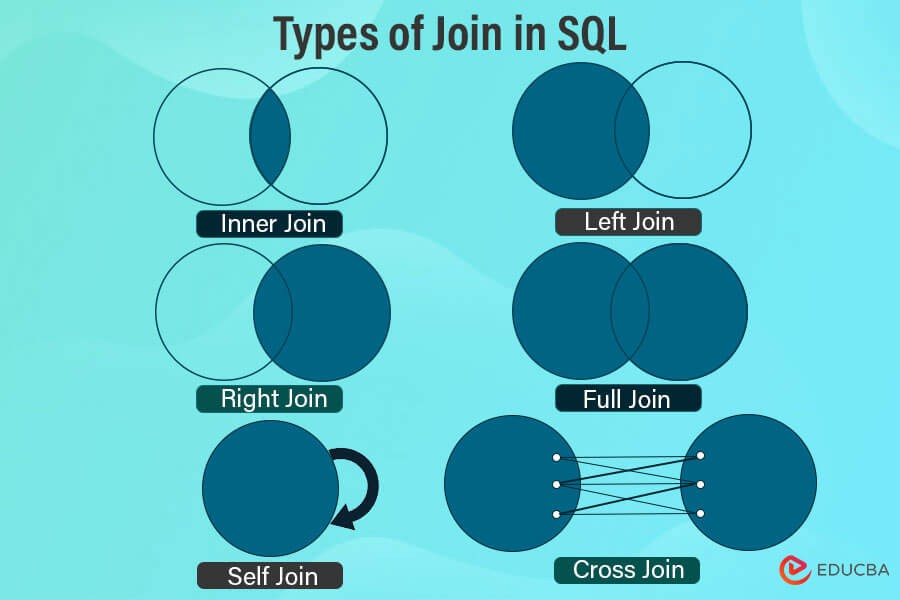

## **For the following examples: Left table:  Patients and Right Table: Immunizations**

###  **INNER JOIN** -This join returns rows when there is at least one match in both tables. If there is no match, the rows are not returned. It's the most common type of join.
### Find Matching Records
### Question: Which medical treatments have been administered to patients, including the patient's name and the cost of each treatment?

In [ ]:
conn.sql("SELECT patients.FIRST, patients.LAST, immunizations.DESCRIPTION, immunizations.BASE_COST FROM immunizations INNER JOIN patients ON immunizations.PATIENT = patients.Id ORDER BY patients.FIRST ASC;")

┌──────────┬───────────────┬────────────────────────────────────────────────────┬───────────┐
│  FIRST   │     LAST      │                    DESCRIPTION                     │ BASE_COST │
│ varchar  │    varchar    │                      varchar                       │  double   │
├──────────┼───────────────┼────────────────────────────────────────────────────┼───────────┤
│ Aaron697 │ Cummings51    │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697 │ Crooks415     │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697 │ Anderson154   │ Pneumococcal conjugate PCV 13                      │    140.52 │
│ Aaron697 │ Hartmann983   │ Hep B  adolescent or pediatric                     │    140.52 │
│ Aaron697 │ Thompson596   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697 │ Rodriguez71   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697 │ Deckow585     │ Influenza  seasonal  injectable

### **LEFT JOIN** - (or LEFT OUTER JOIN): This returns all rows from the left table, and the matched rows from the right table. The result is NULL from the right side, if there is no match.


### Match and Show All Patients
### Question: For all patients, what treatments have they received, if any?

In [ ]:
conn.sql("SELECT patients.FIRST, patients.LAST, immunizations.DESCRIPTION, immunizations.BASE_COST FROM patients LEFT JOIN immunizations ON patients.Id = immunizations.PATIENT ORDER BY patients.FIRST ASC;")

┌───────────┬─────────────┬────────────────────────────────────────────────────┬───────────┐
│   FIRST   │    LAST     │                    DESCRIPTION                     │ BASE_COST │
│  varchar  │   varchar   │                      varchar                       │  double   │
├───────────┼─────────────┼────────────────────────────────────────────────────┼───────────┤
│ Aaron697  │ Legros616   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Deckow585   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Thompson596 │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Auer97      │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Crooks415   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Crooks415   │ Td (adult) preservative free                       │    140.52 │
│ Aaron697  │ Volkman526  │ Influenza  seasonal  injectable  preservat

### **RIGHT JOIN** - (or RIGHT OUTER JOIN): This returns all rows from the right table, and the matched rows from the left table. The result is NULL from the left side, if there is no match.


### - Match and Show All Immunizations
### Question: For all Immunizations recorded, which patients received them, if identifiable?

In [ ]:
conn.sql("SELECT patients.FIRST, patients.LAST, immunizations.DESCRIPTION, immunizations.BASE_COST FROM patients RIGHT JOIN immunizations ON patients.Id = immunizations.PATIENT ORDER BY immunizations.DESCRIPTION;")

┌────────────────┬──────────────┬──────────────┬───────────┐
│     FIRST      │     LAST     │ DESCRIPTION  │ BASE_COST │
│    varchar     │   varchar    │   varchar    │  double   │
├────────────────┼──────────────┼──────────────┼───────────┤
│ Shantay950     │ Quitzon246   │ DTaP         │    140.52 │
│ Cleveland582   │ VonRueden376 │ DTaP         │    140.52 │
│ Flo729         │ Quigley282   │ DTaP         │    140.52 │
│ Flo729         │ Quigley282   │ DTaP         │    140.52 │
│ Werner409      │ Schaden604   │ DTaP         │    140.52 │
│ Pasty639       │ Ortiz186     │ DTaP         │    140.52 │
│ Pasty639       │ Ortiz186     │ DTaP         │    140.52 │
│ Angelica442    │ Kovacek682   │ DTaP         │    140.52 │
│ Cathie710      │ Hegmann834   │ DTaP         │    140.52 │
│ Pasty639       │ Ortiz186     │ DTaP         │    140.52 │
│   ·            │    ·         │  ·           │       ·   │
│   ·            │    ·         │  ·           │       ·   │
│   ·            │    · 

### **FULL OUTER JOIN** (FULL JOIN ): This returns rows when there is a match in one of the tables. It effectively combines the results of both LEFT JOIN and RIGHT JOIN.

### - Comprehensive Match
### Question: What is the complete list of patients and their Immunizations, including those without recorded treatments or identifiable patients?

In [ ]:
conn.sql("SELECT patients.FIRST, patients.LAST, immunizations.DESCRIPTION, immunizations.BASE_COST FROM patients FULL OUTER JOIN immunizations ON patients.Id = immunizations.PATIENT ORDER BY patients.FIRST ASC;")

┌───────────┬─────────────┬────────────────────────────────────────────────────┬───────────┐
│   FIRST   │    LAST     │                    DESCRIPTION                     │ BASE_COST │
│  varchar  │   varchar   │                      varchar                       │  double   │
├───────────┼─────────────┼────────────────────────────────────────────────────┼───────────┤
│ Aaron697  │ Legros616   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Deckow585   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Thompson596 │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Auer97      │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Crooks415   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Aaron697  │ Crooks415   │ Td (adult) preservative free                       │    140.52 │
│ Aaron697  │ Volkman526  │ Influenza  seasonal  injectable  preservat

### **CROSS JOIN** : This join returns a Cartesian product of the two tables, i.e., it returns rows combining each row from the first table with each row from the second table.

## - All Possible Combinations
### Question: What are all possible combinations of patients and immunizations? (sometimes it may not make sense; this is just for demonstration purpose)

In [ ]:
conn.sql("SELECT patients.FIRST, patients.LAST, immunizations.DESCRIPTION FROM patients CROSS JOIN immunizations;")

┌───────────┬─────────────┬────────────────────────────────────────────────────┐
│   FIRST   │    LAST     │                    DESCRIPTION                     │
│  varchar  │   varchar   │                      varchar                       │
├───────────┼─────────────┼────────────────────────────────────────────────────┤
│ Tammy740  │ Ernser583   │ Influenza  seasonal  injectable  preservative free │
│ Tammy740  │ Ernser583   │ Hep A  ped/adol  2 dose                            │
│ Tammy740  │ Ernser583   │ Influenza  seasonal  injectable  preservative free │
│ Tammy740  │ Ernser583   │ Influenza  seasonal  injectable  preservative free │
│ Tammy740  │ Ernser583   │ meningococcal MCV4P                                │
│ Tammy740  │ Ernser583   │ Hep B  adolescent or pediatric                     │
│ Tammy740  │ Ernser583   │ Hep B  adolescent or pediatric                     │
│ Tammy740  │ Ernser583   │ Hib (PRP-OMP)                                      │
│ Tammy740  │ Ernser583   │ 

## **SELF JOIN** - This is not a different type of join, but it's a regular join used to join a table to itself. It's useful for queries where you need to compare rows within the same table.


### Patients in the Same City
## Question: Which pair of patients are from the same city?

In [ ]:
conn.sql("SELECT A.FIRST AS FirstPatient, B.FIRST AS SecondPatient, A.CITY FROM patients A, patients B WHERE A.CITY = B.CITY AND A.Id != B.Id ORDER BY A.CITY ASC;")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────────┬───────────────┬──────────┐
│ FirstPatient │ SecondPatient │   CITY   │
│   varchar    │    varchar    │ varchar  │
├──────────────┼───────────────┼──────────┤
│ Susan422     │ Stefani254    │ Abington │
│ Jennell254   │ Lionel365     │ Abington │
│ Robbie31     │ Antonio44     │ Abington │
│ Joe656       │ Antonio44     │ Abington │
│ Susan422     │ Stevie682     │ Abington │
│ Shaun461     │ Stevie682     │ Abington │
│ Shaun461     │ Weston546     │ Abington │
│ Susan422     │ Elwood28      │ Abington │
│ Susan422     │ Daria61       │ Abington │
│ Shaun461     │ Lita714       │ Abington │
│    ·         │    ·          │    ·     │
│    ·         │    ·          │    ·     │
│    ·         │    ·          │    ·     │
│ Elane105     │ Conrad619     │ Abington │
│ Logan497     │ Conrad619     │ Abington │
│ Sherlene302  │ Conrad619     │ Abington │
│ Milan77      │ Conrad619     │ Abington │
│ Frankie174   │ Seema671      │ Abington │
│ Elane105     │ Josefina523   │

## Tip: Such aggregate operations are slower; we will look at functions in the next tutorial;

## ***Some More examples of JOINS***

### ***INNER JOIN*** with Aggregate Function - Total Cost Per Patient
### Question: What is the total cost of immunizationd per patient?

In [ ]:
conn.sql("SELECT patients.FIRST, patients.LAST, SUM(immunizations.BASE_COST) AS TotalCost FROM immunizations INNER JOIN patients ON immunizations.PATIENT = patients.Id GROUP BY patients.FIRST, patients.LAST ORDER BY patients.FIRST ASC;")

┌───────────┬─────────────┬────────────────────┐
│   FIRST   │    LAST     │     TotalCost      │
│  varchar  │   varchar   │       double       │
├───────────┼─────────────┼────────────────────┤
│ Aaron697  │ Heaney114   │             140.52 │
│ Aaron697  │ Anderson154 │             281.04 │
│ Aaron697  │ Parisian75  │             140.52 │
│ Aaron697  │ Collins926  │             140.52 │
│ Aaron697  │ Dooley940   │             140.52 │
│ Aaron697  │ Frami345    │             140.52 │
│ Aaron697  │ Beer512     │             140.52 │
│ Aaron697  │ Wisoky380   │             281.04 │
│ Aaron697  │ Volkman526  │             140.52 │
│ Aaron697  │ Roberts511  │             140.52 │
│    ·      │     ·       │                ·   │
│    ·      │     ·       │                ·   │
│    ·      │     ·       │                ·   │
│ Blythe746 │ Walter473   │             140.52 │
│ Blythe746 │ Hand679     │             281.04 │
│ Blythe746 │ Murray856   │             140.52 │
│ Blythe746 │ Cummin

### ***RIGHT JOIN*** with Multiple Conditions - Treatments in a Specific Year
### Question: In the year 2020, what treatments were administered, and to which patients?


In [ ]:
conn.sql("SELECT patients.FIRST, patients.LAST, immunizations.DESCRIPTION, immunizations.DATE FROM patients RIGHT JOIN immunizations ON patients.Id = immunizations.PATIENT WHERE immunizations.DATE BETWEEN '2020-01-01' AND '2020-12-31' ORDER BY immunizations.DATE ASC;")

┌──────────────┬─────────────┬────────────────────────────────────────────────────┬────────────┐
│    FIRST     │    LAST     │                    DESCRIPTION                     │    DATE    │
│   varchar    │   varchar   │                      varchar                       │  varchar   │
├──────────────┼─────────────┼────────────────────────────────────────────────────┼────────────┤
│ Jeramy610    │ Wehner319   │ Pneumococcal conjugate PCV 13                      │ 2020-01-01 │
│ Britt177     │ Hermann103  │ Hib (PRP-OMP)                                      │ 2020-01-01 │
│ Jeramy610    │ Wehner319   │ IPV                                                │ 2020-01-01 │
│ Anthony633   │ Lindgren255 │ Influenza  seasonal  injectable  preservative free │ 2020-01-01 │
│ Refugio197   │ Leuschke194 │ MMR                                                │ 2020-01-01 │
│ Refugio197   │ Leuschke194 │ DTaP                                               │ 2020-01-01 │
│ Refugio197   │ Leuschke194 │

### ***FULL OUTER JOIN*** with Sorting - Highest Cost Treatments
### Question: List all patients and their treatments, ordered by the cost of treatments from highest to lowest.

In [ ]:
conn.sql("SELECT patients.FIRST, patients.LAST, immunizations.DESCRIPTION, immunizations.BASE_COST FROM patients FULL OUTER JOIN immunizations ON patients.Id = immunizations.PATIENT ORDER BY immunizations.BASE_COST DESC;")

┌────────────┬─────────────────┬────────────────────────────────────────────────────┬───────────┐
│   FIRST    │      LAST       │                    DESCRIPTION                     │ BASE_COST │
│  varchar   │     varchar     │                      varchar                       │  double   │
├────────────┼─────────────────┼────────────────────────────────────────────────────┼───────────┤
│ Tammy740   │ Ernser583       │ pneumococcal polysaccharide vaccine  23 valent     │    140.52 │
│ Dallas143  │ Klocko335       │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Toshiko149 │ Swaniawski813   │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Anthony633 │ Yundt842        │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Ross213    │ Mayert710       │ DTaP                                               │    140.52 │
│ Roscoe437  │ Pfannerstill264 │ Influenza  seasonal  injectable  preservative free │    140.52 │
│ Sina65     │ Howel

## **Example Involving 3 Tables: Patients, Immunizations, Lab Results.**

## For patients who have received an influenza vaccine, what are their lab results for cholesterol tests?

In [ ]:
conn.sql("""SELECT
    p.FIRST, p.LAST,
    mr.DESCRIPTION AS VaccineDescription,
    lr.DESCRIPTION AS LabTest, lr.VALUE AS LabResult, lr.DATE AS TestDate
FROM
    patients p
JOIN
    immunizations mr ON p.Id = mr.PATIENT
JOIN
    observations lr ON p.Id = lr.PATIENT
WHERE
    mr.DESCRIPTION LIKE '%Influenza%' AND lr.DESCRIPTION LIKE '%Cholesterol%'
ORDER BY
    p.LAST, p.FIRST, lr.DATE;
"""
        )

┌───────────────┬─────────────┬────────────────────────┬──────────────────────────────────────┬───────────┬────────────┐
│     FIRST     │    LAST     │   VaccineDescription   │               LabTest                │ LabResult │  TestDate  │
│    varchar    │   varchar   │        varchar         │               varchar                │  varchar  │  varchar   │
├───────────────┼─────────────┼────────────────────────┼──────────────────────────────────────┼───────────┼────────────┤
│ Aldo414       │ Abbott774   │ Influenza  seasonal …  │ High Density Lipoprotein Cholesterol │ 62.2      │ 2018-02-18 │
│ Aldo414       │ Abbott774   │ Influenza  seasonal …  │ Low Density Lipoprotein Cholesterol  │ 108.0     │ 2018-02-18 │
│ Aldo414       │ Abbott774   │ Influenza  seasonal …  │ Total Cholesterol                    │ 198.3     │ 2018-02-18 │
│ Alexandria361 │ Abbott774   │ Influenza  seasonal …  │ Low Density Lipoprotein Cholesterol  │ 64.7      │ 2020-01-03 │
│ Alexandria361 │ Abbott774   │ 

# Thank you!